In [88]:
import pip
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [89]:
import pandas as pd
import numpy as np
import pandas.testing as tm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,auc
from sklearn.preprocessing import normalize
from sklearn.impute import KNNImputer
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [90]:
data=pd.read_csv(r'/content/TotalOutcome.csv')

In [91]:
np.random.seed(1024)

In [92]:
y=data.CLASS
x=data.drop("CLASS", axis = 1)
xcols = x.columns

In [93]:
!pip install impyute

In [94]:
import impyute as impy
imputed_x=impy.median(x.values)

In [95]:
 imputed_x

array([[1.00000000e+00, 2.87675617e+01, 0.00000000e+00, ...,
        1.70000000e+03, 8.00000000e+00, 1.10000000e+00],
       [2.00000000e+00, 3.46452328e+01, 0.00000000e+00, ...,
        9.00000000e+02, 6.00000000e+01, 1.00000000e+00],
       [3.00000000e+00, 2.83921908e+01, 4.10000000e+01, ...,
        1.27000000e+03, 1.20000000e+01, 1.10000000e+00],
       ...,
       [1.57880000e+04, 2.53501703e+01, 0.00000000e+00, ...,
        9.40000000e+02, 1.95000000e+02, 1.00000000e+00],
       [1.57890000e+04, 3.15060901e+01, 1.54700000e+02, ...,
        6.20000000e+02, 1.70000000e+01, 1.10000000e+00],
       [1.57910000e+04, 2.42586913e+01, 0.00000000e+00, ...,
        9.00000000e+02, 2.40000000e+01, 1.10000000e+00]])

In [96]:
imputed_x = pd.DataFrame(imputed_x,columns=xcols)

In [97]:
imputed_x.shape

(13654, 36)

In [98]:
imputed_x.isna().sum()

ID_C            0
BMI01           0
ETHANL03        0
CIGT01          0
MOVE            0
P_CARB          0
CHOL            0
DFIB            0
P_PROT          0
P_SFAT          0
P_TFAT          0
TOTCHOL_V1      0
CIGTYR01        0
CHOLMDCODE01    0
DIABTS02        0
ELEVEL01        0
GENDER          0
HDLSIU02        0
HYPERT04        0
LDLSIU02        0
RACEGRP         0
TCHSIU01        0
TRGSIU01        0
V1AGE01         0
HYPTMDCODE01    0
SBPA21          0
SBPA22          0
ANTA01          0
ANTA07A         0
ANTA07B         0
ECGMA31         0
HMTA03          0
APASIU01        0
APBSIU01        0
LIPA08          0
CHMA09          0
dtype: int64

In [99]:
x_train, x_test, y_train, y_test = train_test_split(imputed_x,y,test_size = 0.2)
xcols = x_train.columns
xsols = x_test.columns

In [100]:
m1 = x_train.dtypes
m2 = x_test.dtypes

In [101]:
m1

ID_C            float64
BMI01           float64
ETHANL03        float64
CIGT01          float64
MOVE            float64
P_CARB          float64
CHOL            float64
DFIB            float64
P_PROT          float64
P_SFAT          float64
P_TFAT          float64
TOTCHOL_V1      float64
CIGTYR01        float64
CHOLMDCODE01    float64
DIABTS02        float64
ELEVEL01        float64
GENDER          float64
HDLSIU02        float64
HYPERT04        float64
LDLSIU02        float64
RACEGRP         float64
TCHSIU01        float64
TRGSIU01        float64
V1AGE01         float64
HYPTMDCODE01    float64
SBPA21          float64
SBPA22          float64
ANTA01          float64
ANTA07A         float64
ANTA07B         float64
ECGMA31         float64
HMTA03          float64
APASIU01        float64
APBSIU01        float64
LIPA08          float64
CHMA09          float64
dtype: object

In [102]:
m2

ID_C            float64
BMI01           float64
ETHANL03        float64
CIGT01          float64
MOVE            float64
P_CARB          float64
CHOL            float64
DFIB            float64
P_PROT          float64
P_SFAT          float64
P_TFAT          float64
TOTCHOL_V1      float64
CIGTYR01        float64
CHOLMDCODE01    float64
DIABTS02        float64
ELEVEL01        float64
GENDER          float64
HDLSIU02        float64
HYPERT04        float64
LDLSIU02        float64
RACEGRP         float64
TCHSIU01        float64
TRGSIU01        float64
V1AGE01         float64
HYPTMDCODE01    float64
SBPA21          float64
SBPA22          float64
ANTA01          float64
ANTA07A         float64
ANTA07B         float64
ECGMA31         float64
HMTA03          float64
APASIU01        float64
APBSIU01        float64
LIPA08          float64
CHMA09          float64
dtype: object

In [103]:
xpols=x_train.columns
xsols=x_test.columns
x_train = pd.DataFrame(x_train,columns=xcols)

In [104]:
x_train

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
9873,11435.0,26.713342,15.1,1.0,6.375,44.361077,119.30,17.64,14.962199,13.359969,43.287386,137.0,290.0,0.0,0.0,3.0,1.0,1.618707,0.0,1.567245,0.0,3.54282,0.77901,45.0,0.0,90.0,41.0,151.0,83.0,102.0,51.0,5.7,1730.0,470.0,69.0,0.9
5745,6656.0,29.180696,0.0,3.0,7.625,42.932276,353.13,25.07,20.207383,12.579451,38.287968,169.0,0.0,0.0,1.0,2.0,0.0,1.817932,1.0,2.381732,1.0,4.37034,0.37257,50.0,1.0,120.0,77.0,180.0,102.0,107.0,69.0,8.9,1410.0,1030.0,68.0,1.2
7783,9046.0,30.649891,0.0,1.0,8.250,44.837890,177.35,9.57,18.759363,12.625077,38.077117,204.0,940.0,0.0,1.0,2.0,1.0,0.749940,1.0,2.777364,0.0,5.27544,3.81602,61.0,1.0,130.0,63.0,155.0,101.0,105.0,66.0,7.6,1290.0,1090.0,4.0,0.8
9854,11414.0,31.508498,167.0,2.0,7.125,38.830500,235.95,6.29,14.051851,13.402481,35.363257,218.0,60.0,0.0,0.0,5.0,0.0,0.846708,0.0,3.730512,0.0,5.63748,2.31445,47.0,0.0,117.0,79.0,188.0,109.0,112.0,63.0,4.5,1190.0,830.0,21.0,1.3
895,1053.0,25.952983,0.0,1.0,7.125,44.362550,165.54,11.05,18.079197,12.510175,38.343605,251.0,93.0,0.0,0.0,4.0,1.0,1.618707,1.0,4.417017,1.0,6.49086,0.99352,54.0,1.0,152.0,82.0,161.0,85.0,102.0,49.0,9.0,1330.0,900.0,351.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,696.0,31.227855,162.1,2.0,6.875,62.763194,118.19,16.75,10.909737,6.548243,17.271375,172.0,540.0,1.0,0.0,5.0,0.0,0.946321,1.0,2.405135,0.0,4.44792,2.39348,46.0,1.0,130.0,94.0,174.0,102.0,107.0,72.0,4.7,1040.0,770.0,36.0,1.1
2661,3081.0,28.348794,331.9,2.0,8.625,43.504504,308.21,11.03,12.732417,11.557213,29.191780,166.0,1200.0,0.0,0.0,2.0,0.0,1.195353,0.0,1.923363,0.0,4.29276,2.56283,50.0,0.0,115.0,73.0,175.0,103.0,102.0,62.0,5.8,1300.0,790.0,55.0,1.1
2540,2936.0,28.614529,190.7,3.0,6.375,30.799793,189.07,6.42,19.300209,13.831996,35.535630,238.0,0.0,0.0,1.0,5.0,0.0,1.008540,1.0,4.054848,0.0,6.15468,2.38219,59.0,1.0,112.0,77.0,176.0,103.0,105.0,61.0,7.1,1410.0,1200.0,36.0,1.1
9105,10576.0,26.257686,60.4,2.0,7.250,48.797843,155.87,10.35,18.063397,8.922437,29.023228,219.0,640.0,0.0,0.0,3.0,1.0,1.170449,1.0,3.944659,0.0,5.66334,1.19674,49.0,1.0,165.0,84.0,154.0,91.0,102.0,75.0,8.6,1280.0,1070.0,8.0,0.9


In [105]:
x_test = pd.DataFrame(x_test,columns=xpols)

In [106]:
x_test

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
9835,11394.0,22.369954,0.0,1.0,6.625,12.465220,282.67,5.50,28.590508,29.034104,59.678035,162.0,1350.0,0.0,0.0,5.0,0.0,1.163700,0.0,2.715300,0.0,4.18932,0.67740,59.0,0.0,101.0,61.0,174.0,80.0,92.0,58.0,10.8,1030.0,700.0,258.0,1.0
13294,15376.0,27.663420,182.3,2.0,8.500,52.124511,81.38,19.24,12.070397,8.932477,24.510221,272.0,360.0,0.0,0.0,5.0,0.0,1.095740,0.0,5.260648,0.0,7.03392,1.47899,61.0,0.0,131.0,88.0,179.0,92.0,102.0,57.0,8.5,1410.0,1470.0,23.0,1.3
10451,12095.0,26.046142,56.6,2.0,7.500,46.428722,122.74,11.27,17.423890,9.973691,30.353747,157.0,540.0,0.0,0.0,4.0,0.0,2.141673,0.0,1.535619,1.0,4.06002,0.83546,46.0,0.0,120.0,67.0,184.0,97.0,108.0,60.0,6.4,2490.0,560.0,76.0,1.1
10305,11930.0,26.845963,54.0,3.0,8.125,52.281152,182.12,22.77,21.556806,9.543489,25.280035,180.0,0.0,0.0,0.0,6.0,1.0,1.369675,0.0,2.943773,0.0,4.65480,0.74514,47.0,0.0,115.0,77.0,162.0,99.0,106.0,67.0,8.4,1110.0,980.0,13.0,1.0
10592,12254.0,28.437202,45.3,2.0,6.750,41.934642,173.44,6.83,15.502389,13.883307,40.341907,176.0,228.0,0.0,0.0,6.0,0.0,1.008540,1.0,3.175608,1.0,4.55136,0.80159,45.0,1.0,104.0,74.0,177.0,99.0,107.0,45.0,5.3,1200.0,930.0,79.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8469,9839.0,51.029176,0.0,3.0,6.875,41.223776,245.41,18.99,23.400100,12.632353,37.477167,180.0,0.0,0.0,1.0,4.0,1.0,1.111980,0.0,2.942868,1.0,4.65480,1.30964,47.0,0.0,129.0,82.0,161.0,149.0,146.0,75.0,3.6,1430.0,1110.0,126.0,0.9
13014,15061.0,25.350170,0.0,3.0,9.375,50.059695,551.90,26.74,18.075566,14.384779,34.432984,200.0,0.0,0.0,0.0,6.0,1.0,1.525740,1.0,3.165264,1.0,5.17200,1.04997,47.0,1.0,104.0,80.0,164.0,82.0,104.0,53.0,5.0,1460.0,670.0,466.0,1.4
9925,11495.0,22.432273,92.4,1.0,10.000,53.628835,174.92,12.87,18.676042,8.978309,22.058424,217.0,680.0,0.0,0.0,2.0,0.0,1.111980,1.0,3.997956,0.0,5.61162,1.09513,48.0,1.0,136.0,73.0,172.0,85.0,92.0,60.0,8.1,1410.0,980.0,7.0,1.1
811,946.0,23.053869,26.4,1.0,6.250,48.153460,161.49,13.66,18.257133,11.915710,34.080298,288.0,725.0,0.0,0.0,2.0,0.0,0.846708,0.0,5.825172,0.0,7.44768,1.69350,47.0,0.0,109.0,75.0,182.0,88.0,93.0,73.0,8.5,790.0,1520.0,52.0,1.2


In [108]:
clf = LogisticRegression(C=1.0, penalty= 'l2', solver='liblinear',class_weight='balanced').fit(x_train, y_train)
pred_visit_2 = clf.predict(x_test)

accuracy_score(pred_visit_2,y_test)

0.6528744049798608

In [109]:
pred_visit_2 = clf.predict(x_test)
accuracy_score(pred_visit_2,y_test)

0.6528744049798608

In [174]:
y_test.shape

(2726,)

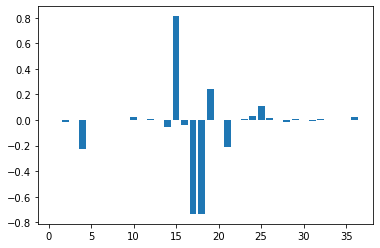

In [111]:
%matplotlib inline

plt.bar(list(range(1,37)),clf.coef_.ravel())
plt.show()
plt.close()

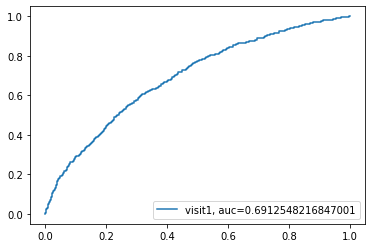

In [116]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="visit1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [113]:
confusion_matrix(y_test, pred_visit_1)

array([[1315,  705],
       [ 274,  437]])

In [117]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [118]:
auc

0.6912548216847001

In [120]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(imputed_x, y)

In [122]:
fit.get_feature_names_out(input_features=xcols)

array(['DIABTS02', 'GENDER', 'HDLSIU02', 'HYPERT04', 'SBPA21'],
      dtype=object)

In [123]:
fi = {f:score for f,score in zip(range(0,37),fit.scores_.ravel())}

In [124]:
import operator
sorted_x = sorted(fi.items(), key=operator.itemgetter(1),reverse=True)

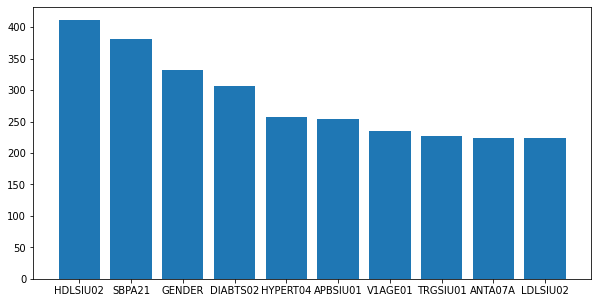

In [129]:
import numpy as np
import matplotlib.pyplot as plt
popularity_data = sorted_x[:10]

people = list(zip(*popularity_data))[0]
score = list(zip(*popularity_data))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(10,5))
plt.bar(xcols[list(people)],score)
plt.xticks(xcols[list(people)])
plt.show()

In [130]:
data2=pd.read_csv('/content/visit2_TotalOutcome (2) (1).csv')

In [131]:
np.random.seed(1024)

In [163]:
y2=data2.CLASS
x2=data2.drop("CLASS", axis = 1)
z=x2.drop("MOVE", axis = 1)
a=z.drop("LIPA08", axis = 1)
b=a.drop("CHMA09", axis = 1)
c=b.drop("HMTA03", axis = 1)
ccols = c.columns

In [149]:
import impyute as impy
imputed_c=impy.median(c.values)

In [150]:
 imputed_c

array([[1.00000000e+00, 2.91271562e+01, 0.00000000e+00, ...,
        3.00000000e+00, 1.59000000e+02, 1.00000000e+00],
       [2.00000000e+00, 3.43072305e+01, 0.00000000e+00, ...,
        2.00000000e+00, 1.64000000e+02, 0.00000000e+00],
       [3.00000000e+00, 3.29552215e+01, 5.66000000e+01, ...,
        2.00000000e+00, 1.64000000e+02, 0.00000000e+00],
       ...,
       [1.57860000e+04, 3.06425574e+01, 0.00000000e+00, ...,
        3.00000000e+00, 1.79000000e+02, 0.00000000e+00],
       [1.57870000e+04, 3.69973173e+01, 0.00000000e+00, ...,
        1.00000000e+00, 1.67000000e+02, 0.00000000e+00],
       [1.57890000e+04, 3.39803904e+01, 7.99700000e+02, ...,
        3.00000000e+00, 1.66000000e+02, 0.00000000e+00]])

In [151]:
imputed_c = pd.DataFrame(imputed_c,columns=ccols)

In [170]:
imputed_c.shape

(13626, 38)

In [153]:
imputed_c.isna().sum()

ID_C              0
BMI21             0
ETHANL24          0
CIGT21            0
CURSMK21          0
CARB              0
CHOL              0
DFIB              0
PROT              0
SFAT              0
TFAT              0
TCAL              0
HDLSIU21          0
LDLSIU22          0
TCHSIU21          0
TRGSIU21          0
SBPB15            0
SBPB16            0
ANTB04A           0
ANTB04B           0
CGMI24            0
APASIU21          0
APBSIU21          0
HYPTMD21          0
ANTICOAGCODE21    0
ASPIRINCODE21     0
STATINCODE21      0
HYPTMDC#N/AD21    0
HYPRT24           0
CIGTYR01          0
V2AG22            0
RACGRP            0
DIABTS22          0
LVL01             0
GENDER            0
CIGT21.1          0
ANTA01            0
CHOLMDCCODE21     0
dtype: int64

In [175]:
c_train, c_test, d_train, d_test = train_test_split(imputed_c,y2,test_size = 0.2)
ccols = c_train.columns
csols = c_test.columns

In [176]:
m1 = c_train.dtypes
m2 = c_test.dtypes

In [177]:
cpols=c_train.columns
csols=c_test.columns
c_train = pd.DataFrame(c_train,columns=ccols)

In [178]:
c_train

,ID_C,BMI21,ETHANL24,CIGT21,CURSMK21,CARB,CHOL,DFIB,PROT,SFAT,TFAT,TCAL,HDLSIU21,LDLSIU22,TCHSIU21,TRGSIU21,SBPB15,SBPB16,ANTB04A,ANTB04B,CGMI24,APASIU21,APBSIU21,HYPTMD21,ANTICOAGCODE21,ASPIRINCODE21,STATINCODE21,HYPTMDC#N/AD21,HYPRT24,CIGTYR01,V2AG22,RACGRP,DIABTS22,LVL01,GENDER,CIGT21.1,ANTA01,CHOLMDCCODE21
6868,7994.0,21.391242,0.0,1.0,1.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,1.18956,4.334136,6.30984,1.71608,136.0,68.0,82.0,90.0,0.0,1380.0,1090.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,63.0,0.0,0.0,3.0,1.0,1.0,157.0,0.0
1400,1648.0,24.773534,0.0,3.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,1.24128,3.708324,5.53404,1.27577,148.0,106.0,99.0,111.0,0.0,1180.0,760.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,58.0,1.0,0.0,6.0,1.0,3.0,167.0,0.0
9716,11255.0,26.119929,268.0,1.0,1.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,2.56014,1.934328,4.78410,0.63224,122.0,74.0,83.0,100.0,0.0,2090.0,680.0,1.0,0.0,0.0,0.0,1.0,1.0,555.0,55.0,1.0,0.0,0.0,0.0,1.0,176.0,0.0
3844,4476.0,25.825343,32.4,2.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,1.52574,2.885976,5.27544,1.88543,156.0,106.0,81.0,104.0,0.0,1610.0,710.0,1.0,0.0,1.0,0.0,1.0,1.0,200.0,50.0,0.0,0.0,6.0,1.0,2.0,153.0,0.0
402,467.0,38.138204,0.0,2.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,0.74994,3.630744,5.40474,2.23542,120.0,68.0,122.0,118.0,0.0,1330.0,1040.0,0.0,0.0,1.0,0.0,0.0,0.0,520.0,51.0,0.0,1.0,3.0,0.0,2.0,167.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2511.0,30.026784,0.0,3.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,0.90510,4.080708,5.74092,1.64834,166.0,114.0,103.0,102.0,0.0,810.0,1180.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,55.0,0.0,0.0,3.0,0.0,3.0,174.0,0.0
545,640.0,25.688173,56.6,3.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,3.07734,3.284220,6.74946,0.84675,168.0,110.0,87.0,104.0,0.0,2330.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,1.0,0.0,2.0,1.0,3.0,164.0,0.0
2795,3253.0,28.866836,0.0,1.0,1.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,1.49988,2.410152,4.31862,0.89191,124.0,72.0,94.0,110.0,0.0,1260.0,680.0,0.0,0.0,1.0,0.0,0.0,0.0,780.0,60.0,0.0,0.0,5.0,1.0,1.0,166.0,0.0
10447,12089.0,30.312357,250.8,3.0,0.0,178.745714,201.31,15.405,65.235,17.805,50.22,1460.83,0.67236,3.294564,4.93926,2.12252,166.0,110.0,105.0,104.0,0.0,970.0,1080.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,68.0,0.0,0.0,6.0,0.0,3.0,171.0,0.0


In [179]:
c_test = pd.DataFrame(c_test,columns=csols)

In [180]:
clf = LogisticRegression(C=1.0, penalty= 'l2', solver='liblinear',class_weight='balanced').fit(c_train, y_train)
pred_visit_3 = clf.predict(c_test)

accuracy_score(pred_visit_3,d_test)

0.5220102714600147

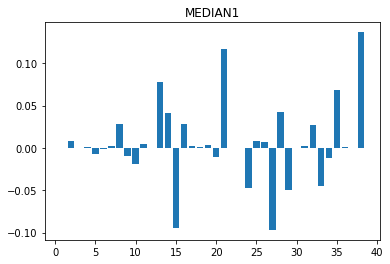

In [205]:
%matplotlib inline

plt.bar(list(range(1,39)),clf.coef_.ravel())
plt.title("MEDIAN1")
plt.show()
plt.close()

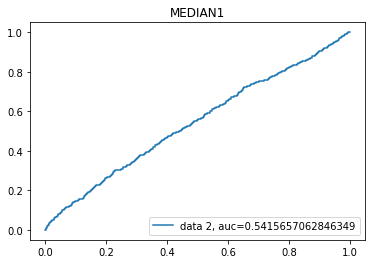

In [203]:
d_pred_proba = clf.predict_proba(c_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(d_test,  d_pred_proba)
auc = metrics.roc_auc_score(d_test, d_pred_proba)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))
plt.legend(loc=4)
plt.title("MEDIAN1")
plt.show()

In [184]:
fpr, tpr, _ = metrics.roc_curve(d_test,  d_pred_proba)
auc = metrics.roc_auc_score(d_test, d_pred_proba)

In [186]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(imputed_c, y2)

In [193]:
fit.get_feature_names_out(input_features=ccols)

array(['HDLSIU21', 'SBPB15', 'HYPTMDC#N/AD21', 'V2AG22', 'DIABTS22'],
      dtype=object)

In [194]:
fi = {f:score for f,score in zip(range(0,39),list(fit.scores_))}

In [195]:
import operator
sorted_x = sorted(fi.items(), key=operator.itemgetter(1),reverse=True)

In [197]:
sorted_x[:4]

[(32, 456.20544805810806),
 (27, 449.70077816349755),
 (30, 350.6054038009577),
 (16, 331.6988181092745)]

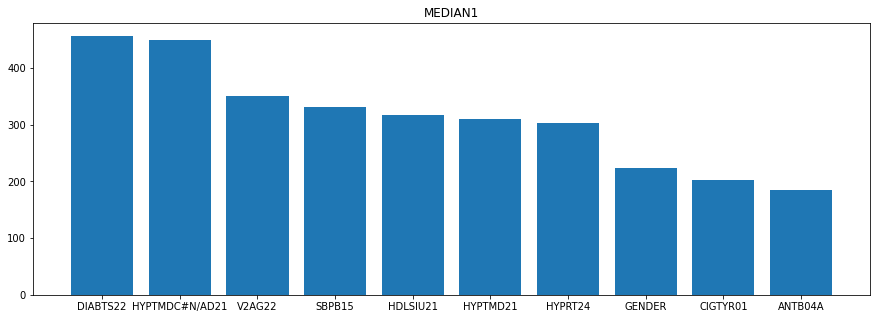

In [204]:
import numpy as np
import matplotlib.pyplot as plt
popularity_data = sorted_x[:10]

people = list(zip(*popularity_data))[0]
score = list(zip(*popularity_data))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(15,5))
plt.bar(imputed_c.columns[list(people)],score)
plt.xticks(imputed_c.columns[list(people)])
plt.title("MEDIAN1")
plt.show()